In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer
sns.set()
%matplotlib inline
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from collections import Counter
from random import randint
from wordcloud import WordCloud
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
from sklearn.naive_bayes import MultinomialNB


In [2]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [3]:
# Load the dataset
df_company = pd.read_csv('Company_Data.csv')
df_industries = pd.read_excel('Industries.xlsx')

In [4]:
# Head of the dataset
df_company.head()


,StartupID,Organization ID,Startup Name,Created by User ID,Primary Industry Name,short_pitch,full_elevator_pitch,linked_in_url,facebook_url,video_elevator_pitch_url,...,first_time_founder,location_city,Startup Country,location_postcode,location_regional,Accelerate URL,Primary Contact User Id,Primary Contact Core Profile ID,Parent Industry,Additional Industries
0,23,11446,QMedic,892,Healthcare / Life Sciences,QMedic's wearable medical alert service passiv...,80% of older adults do not press the panic but...,http://www.linkedin.com/company/qmedic,https://www.facebook.com/qmedichealth,http://youtu.be/mTO5goQ4sA8?rel=0,...,0,NaN,United States,NaN,NaN,https://accelerate.masschallenge.org/startup/2...,892,7,Healthcare / Life Sciences,High Tech
1,52,5842,Green City Growers,968,Social Impact,Green City Growers transforms unused space int...,GCG is an Urban Farming company focused on gro...,NaN,https://www.facebook.com/pages/Green-City-Grow...,NaN,...,0,NaN,United States,NaN,NaN,https://accelerate.masschallenge.org/startup/5...,968,72,Social Impact,Education; Environment; Public Health
2,60,9169,Mootus,951,Internet & Web,Mootus is reinventing the way lawyers work thr...,The legal industry wastes billions on unnecess...,NaN,https://www.facebook.com/Mootus,NaN,...,0,NaN,United States,NaN,NaN,https://accelerate.masschallenge.org/startup/6...,951,58,High Tech,NaN
3,75,15498,Verbal Applications Inc.,1009,Healthcare IT,Verbal bridges the communications gap between ...,Imagine you or a loved one are in one of the 2...,http://www.linkedin.com/company/verbal-applica...,http://facebook.com/verbalapp,NaN,...,0,NaN,United States,NaN,NaN,https://accelerate.masschallenge.org/startup/7...,1009,90111,Healthcare / Life Sciences,Design; Diagnostics; Enterprise Software; Heal...
4,84,14157,"Technology For Autism Now, Inc.",1025,Education,Improving the lives of children and families l...,"Technology for Autism Now, Inc. (TAN), a 501c3...",http://www.linkedin.com/home?trk=hb_tab_home_top,http://www.facebook.com/groups/141818942524238/,http://youtu.be/Gl0fiTygSeE,...,0,NaN,United States,NaN,NaN,https://accelerate.masschallenge.org/startup/8...,1025,123,Social Impact,Social Impact


In [5]:
# Describe the dataset
df_company.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
StartupID,51088.0,26310.956780,14879.889801,18.0,13577.75,26374.5,39178.25,51965.0
Organization ID,51088.0,33778.992366,20737.118604,1.0,12774.75,37529.5,52279.25,66325.0
Created by User ID,51088.0,70897.100200,44780.207442,28.0,33336.50,67457.5,99875.00,153034.0
first_time_founder,51088.0,0.098536,0.298041,0.0,0.00,0.0,0.00,1.0
Primary Contact User Id,51088.0,70958.639093,44780.161979,28.0,33417.00,67535.5,99911.50,153034.0
Primary Contact Core Profile ID,51088.0,68163.782199,54619.623549,4.0,26536.75,51767.5,97782.50,175759.0


In [6]:
# Info of the dataset
df_company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51088 entries, 0 to 51087
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   StartupID                        51088 non-null  int64 
 1   Organization ID                  51088 non-null  int64 
 2   Startup Name                     51064 non-null  object
 3   Created by User ID               51088 non-null  int64 
 4   Primary Industry Name            51088 non-null  object
 5   short_pitch                      50084 non-null  object
 6   full_elevator_pitch              50000 non-null  object
 7   linked_in_url                    22323 non-null  object
 8   facebook_url                     19858 non-null  object
 9   video_elevator_pitch_url         19035 non-null  object
 10  website_url                      38332 non-null  object
 11  twitter_handle                   18662 non-null  object
 12  Stealth Mode                    

In [7]:
# Check the sum of missing values
df_company.isna().sum()

StartupID                              0
Organization ID                        0
Startup Name                          24
Created by User ID                     0
Primary Industry Name                  0
short_pitch                         1004
full_elevator_pitch                 1088
linked_in_url                      28765
facebook_url                       31230
video_elevator_pitch_url           32053
website_url                        12756
twitter_handle                     32426
Stealth Mode                           0
Startup Created Date                2330
Date Founded                        4229
location_street_address            45340
first_time_founder                     0
location_city                       9003
Startup Country                     3439
location_postcode                  18923
location_regional                  10051
Accelerate URL                         0
Primary Contact User Id                0
Primary Contact Core Profile ID        0
Parent Industry 

In [8]:
# Data Cleaning of the important attributes
df_company['short_pitch'].fillna('No description available', inplace=True)
df_company['full_elevator_pitch'].fillna('No detailed description available', inplace=True)

In [9]:
df_company['Primary Industry Name'] = df_company['Primary Industry Name'].str.lower().str.strip()
df_industries['Primary Industry'] = df_industries['Primary Industry'].str.lower().str.strip()


In [10]:
df_company['Primary Industry Name'].unique()

array(['healthcare / life sciences', 'social impact', 'internet & web',
       'healthcare it', 'education', 'medical devices',
       'hardware & robotics', 'enterprise software', 'gaming & consumer',
       'public health', 'therapeutics (pharma / biotech)', 'efficiency',
       'general', 'retail', 'high tech', 'food, beverages & restaurants',
       'materials', 'energy / clean tech', 'manufacturing', 'design',
       'diagnostics', 'other - services', 'telecommunications & mobile',
       'generation', 'consumer products', 'entertainment & media',
       'aerospace', 'poverty alleviation', 'environment',
       'health and wellness', 'transportation & logistics',
       'peace & human rights', 'healthcare delivery', 'healthcare',
       'marine technology', 'education technology', 'storage',
       'transmission', 'online commerce & marketplaces',
       'retail & advertising technology', 'fundraising',
       'sports technology', 'internet of things', 'cybersecurity',
       'fin

In [11]:
len(df_company['Primary Industry Name'].unique())

50

In [12]:
df_industries

,Primary Industry,Secondary Industry (this is what we want to predict)
0,healthcare,NaN
1,NaN,Digital Health and Imaging Technologies
2,NaN,Consumer Health and Wellness Platforms
3,NaN,Advanced Therapeutic Platforms
4,NaN,Precision and Personalized Medicine
...,...,...
56,NaN,Media & Ad
57,NaN,Travel & Hospitality
58,NaN,Real Estate & Construction
59,NaN,E-Commerce & Marketplaces


In [13]:
df_industries['Primary Industry'].unique()

array(['healthcare', nan, 'finance and financial inclusion',
       'climate and environment', 'sustainable food and food access',
       'security and resiliency', 'industry 4.0',
       'cross-industry or other'], dtype=object)

In [14]:
len(df_industries['Secondary Industry (this is what we want to predict)'].unique())

55

In [15]:
# Define the mapping of primary industries to the new categories to company data
primary_industry_mapping = {
    'Healthcare': ['Healthcare / Life Sciences','Healthcare IT','Diagnostics','Medical Devices','Public Health','Therapeutics (Pharma / Biotech)','Healthcare Delivery', 'Healthcare', 'Health and Wellness'],
    'Finance and Financial Inclusion': ['Financial Technology', 'Fundraising', 'Poverty Alleviation'],
    'Climate and Environment': ['Environment', 'Water Treatment & Technology','Efficiency', 'Transmission', 'Materials', 'Energy / Clean Tech','Environment'],
    'Sustainable Food and Food Access': ['Food, Beverages & Restaurants', 'General', 'Retail', 'Agriculture'],
    'Security and Resiliency': ['Security','Cybersecurity'],
    'Industry 4.0': ['High Tech','Hardware & Robotics', 'Internet & Web', 'Internet of Things'],
    'Cross-Industry or Other': ['Other - Services', 'Education Technology', 'Online Commerce & Marketplaces', 'Education','Social Impact', 'Education', 'Enterprise Software', 'Gaming & Consumer','Manufacturing', 'Design','Telecommunications & Mobile','Generation', 'Consumer Products', 'Entertainment & Media', 'Aerospace','Transportation & Logistics','Peace & Human Rights','Marine Technology',  'Storage','Retail & Advertising Technology','Sports Technology','Travel & Tourism','Art & Fashion', 'Proptech']
}

# Create a reverse mapping dictionary
reverse_mapping = {}
for key, values in primary_industry_mapping.items():
    for value in values:
        reverse_mapping[value] = key

# Adding the new column to company_data with mapped values
df_company['Mapped Primary Industry'] = df_company['Primary Industry Name'].map(reverse_mapping)

# Display the updated dataframe
df_company.head()

,StartupID,Organization ID,Startup Name,Created by User ID,Primary Industry Name,short_pitch,full_elevator_pitch,linked_in_url,facebook_url,video_elevator_pitch_url,...,location_city,Startup Country,location_postcode,location_regional,Accelerate URL,Primary Contact User Id,Primary Contact Core Profile ID,Parent Industry,Additional Industries,Mapped Primary Industry
0,23,11446,QMedic,892,healthcare / life sciences,QMedic's wearable medical alert service passiv...,80% of older adults do not press the panic but...,http://www.linkedin.com/company/qmedic,https://www.facebook.com/qmedichealth,http://youtu.be/mTO5goQ4sA8?rel=0,...,NaN,United States,NaN,NaN,https://accelerate.masschallenge.org/startup/2...,892,7,Healthcare / Life Sciences,High Tech,NaN
1,52,5842,Green City Growers,968,social impact,Green City Growers transforms unused space int...,GCG is an Urban Farming company focused on gro...,NaN,https://www.facebook.com/pages/Green-City-Grow...,NaN,...,NaN,United States,NaN,NaN,https://accelerate.masschallenge.org/startup/5...,968,72,Social Impact,Education; Environment; Public Health,NaN
2,60,9169,Mootus,951,internet & web,Mootus is reinventing the way lawyers work thr...,The legal industry wastes billions on unnecess...,NaN,https://www.facebook.com/Mootus,NaN,...,NaN,United States,NaN,NaN,https://accelerate.masschallenge.org/startup/6...,951,58,High Tech,NaN,NaN
3,75,15498,Verbal Applications Inc.,1009,healthcare it,Verbal bridges the communications gap between ...,Imagine you or a loved one are in one of the 2...,http://www.linkedin.com/company/verbal-applica...,http://facebook.com/verbalapp,NaN,...,NaN,United States,NaN,NaN,https://accelerate.masschallenge.org/startup/7...,1009,90111,Healthcare / Life Sciences,Design; Diagnostics; Enterprise Software; Heal...,NaN
4,84,14157,"Technology For Autism Now, Inc.",1025,education,Improving the lives of children and families l...,"Technology for Autism Now, Inc. (TAN), a 501c3...",http://www.linkedin.com/home?trk=hb_tab_home_top,http://www.facebook.com/groups/141818942524238/,http://youtu.be/Gl0fiTygSeE,...,NaN,United States,NaN,NaN,https://accelerate.masschallenge.org/startup/8...,1025,123,Social Impact,Social Impact,NaN


In [16]:
df_industries.describe()


,Primary Industry,Secondary Industry (this is what we want to predict)
count,7,54
unique,7,54
top,healthcare,Digital Health and Imaging Technologies
freq,1,1


In [17]:
# Reverse mapping dictionary provided by the user
primary_secondary_mapping = {
    'Healthcare': ['Digital Health and Imaging Technologies', 'Consumer Health and Wellness Platforms', 'Advanced Therapeutic Platforms', 'Precision and Personalized Medicine', 'Medical Devices and Future of Surgery', 'Mental Health Care', 'Integrated Health Systems and Care Delivery'],
    'Finance and Financial Inclusion':['Digital Payments and Remittances', 'Banking and Neobanking', 'Lending and Credit Innovations', 'Insurance Technology (Insurtech)', 'Investment & Wealth Management', 'Financial Access, Education, and Democratization', 'Blockchain and Financial Infrastructure', 'Regulatory Technology (RegTech)'],
    'Climate and Environment': ['Renewable Energy and Energy Efficiency', 'Sustainable Transportation and Urban Solutions', 'Circular Economy and Resource Management', 'Land Use, Conservation, and Biodiversity', 'Carbon Management and Storage', 'Water Solutions and Conservation'],
    'Sustainable Food and Food Access': ['Alternative Proteins and Animal Health',  'Precision Agriculture', 'Food Waste Reduction', 'Food Packaging', 'Agri-Tech for Vertical and Urban Farming', 'Other area of Sustainable Food', 'Food Supply Chain Innovation'],
    'Security and Resiliency': ['Cybersecurity', 'Emergency Response and Disaster Management', 'Public Safety and Law Enforcement Technologies', 'Secure Communications', 'Urban Resilience and Smart Cities', 'Data Security and Privacy', 'Naval & Maritime', 'Aerospace & Space Commercialization'],
    'Industry 4.0': ['Advanced Manufacturing', 'Robotics & Automation', 'Enterprise Software', 'Industrial and Manufacturing', 'New Materials & Packaging (non-food)', 'Semiconductors', 'Supply Chain & Logistics', 'Deeptech'],
    'Cross-Industry or Other': ['AI/Machine Learning', 'Brand & Retail', 'Consumer Goods and Services', 'Creative and Media Technologies', 'Educational Technology and Platforms', 'Media & Ad', 'Travel & Hospitality', 'Real Estate & Construction', 'E-Commerce & Marketplaces', 'Other']
}

# Create a reverse mapping dictionary
reverse_mapping_ind = {}
for key, values in primary_secondary_mapping.items():
    for value in values:
        reverse_mapping_ind[value] = key

# Adding the new column to industries_data with mapped values
df_industries['Mapped Primary Industry'] = df_industries['Secondary Industry (this is what we want to predict)'].map(reverse_mapping_ind)

# Display the updated dataframe
df_industries

,Primary Industry,Secondary Industry (this is what we want to predict),Mapped Primary Industry
0,healthcare,NaN,NaN
1,NaN,Digital Health and Imaging Technologies,Healthcare
2,NaN,Consumer Health and Wellness Platforms,Healthcare
3,NaN,Advanced Therapeutic Platforms,NaN
4,NaN,Precision and Personalized Medicine,NaN
...,...,...,...
56,NaN,Media & Ad,Cross-Industry or Other
57,NaN,Travel & Hospitality,Cross-Industry or Other
58,NaN,Real Estate & Construction,Cross-Industry or Other
59,NaN,E-Commerce & Marketplaces,Cross-Industry or Other


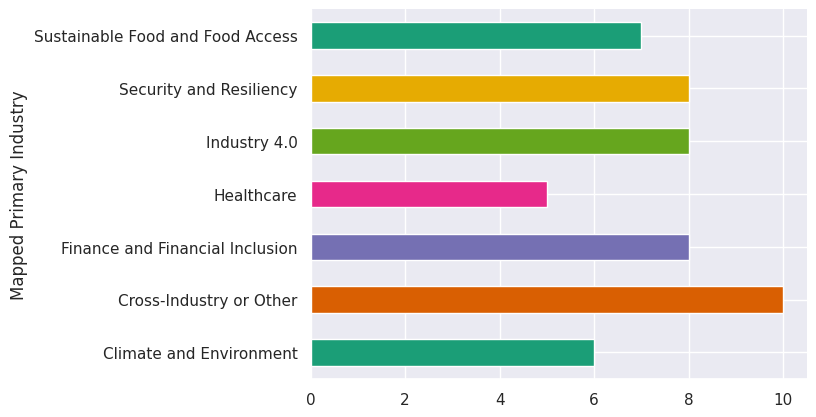

In [18]:
# Your existing code
df_industries.groupby('Mapped Primary Industry').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))

# Modify the spine visibility settings
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Show the plot
plt.show()

In [19]:
 df_company.describe(include='all')

,StartupID,Organization ID,Startup Name,Created by User ID,Primary Industry Name,short_pitch,full_elevator_pitch,linked_in_url,facebook_url,video_elevator_pitch_url,...,location_city,Startup Country,location_postcode,location_regional,Accelerate URL,Primary Contact User Id,Primary Contact Core Profile ID,Parent Industry,Additional Industries,Mapped Primary Industry
count,51088.000000,51088.000000,51064,51088.000000,51088,51088,51088,22323,19858,19035,...,42085,47649,32165,41037,51088,51088.000000,51088.000000,51088,34556,0
unique,NaN,NaN,48267,NaN,50,48333,48350,21464,19051,18547,...,9383,222,13420,1268,51071,NaN,NaN,5,9033,0
top,NaN,NaN,Rice farming business,NaN,internet & web,No description available,No detailed description available,http://www.linkedin.com/profile/edit?trk=hb_ta...,http://www.fcbk.com,https://www.youtube.com/watch?v=Lb0Yz_5ZYzI,...,Boston,United States,02139,Massachusetts,https://accelerate.masschallenge.org/startup/3...,NaN,NaN,High Tech,Internet & Web,NaN
freq,NaN,NaN,43,NaN,2931,1004,1088,33,17,23,...,2215,19443,349,7431,3,NaN,NaN,17953,1358,NaN
mean,26310.956780,33778.992366,NaN,70897.100200,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,70958.639093,68163.782199,NaN,NaN,NaN
std,14879.889801,20737.118604,NaN,44780.207442,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,44780.161979,54619.623549,NaN,NaN,NaN
min,18.000000,1.000000,NaN,28.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,28.000000,4.000000,NaN,NaN,NaN
25%,13577.750000,12774.750000,NaN,33336.500000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,33417.000000,26536.750000,NaN,NaN,NaN
50%,26374.500000,37529.500000,NaN,67457.500000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,67535.500000,51767.500000,NaN,NaN,NaN
75%,39178.250000,52279.250000,NaN,99875.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,99911.500000,97782.500000,NaN,NaN,NaN


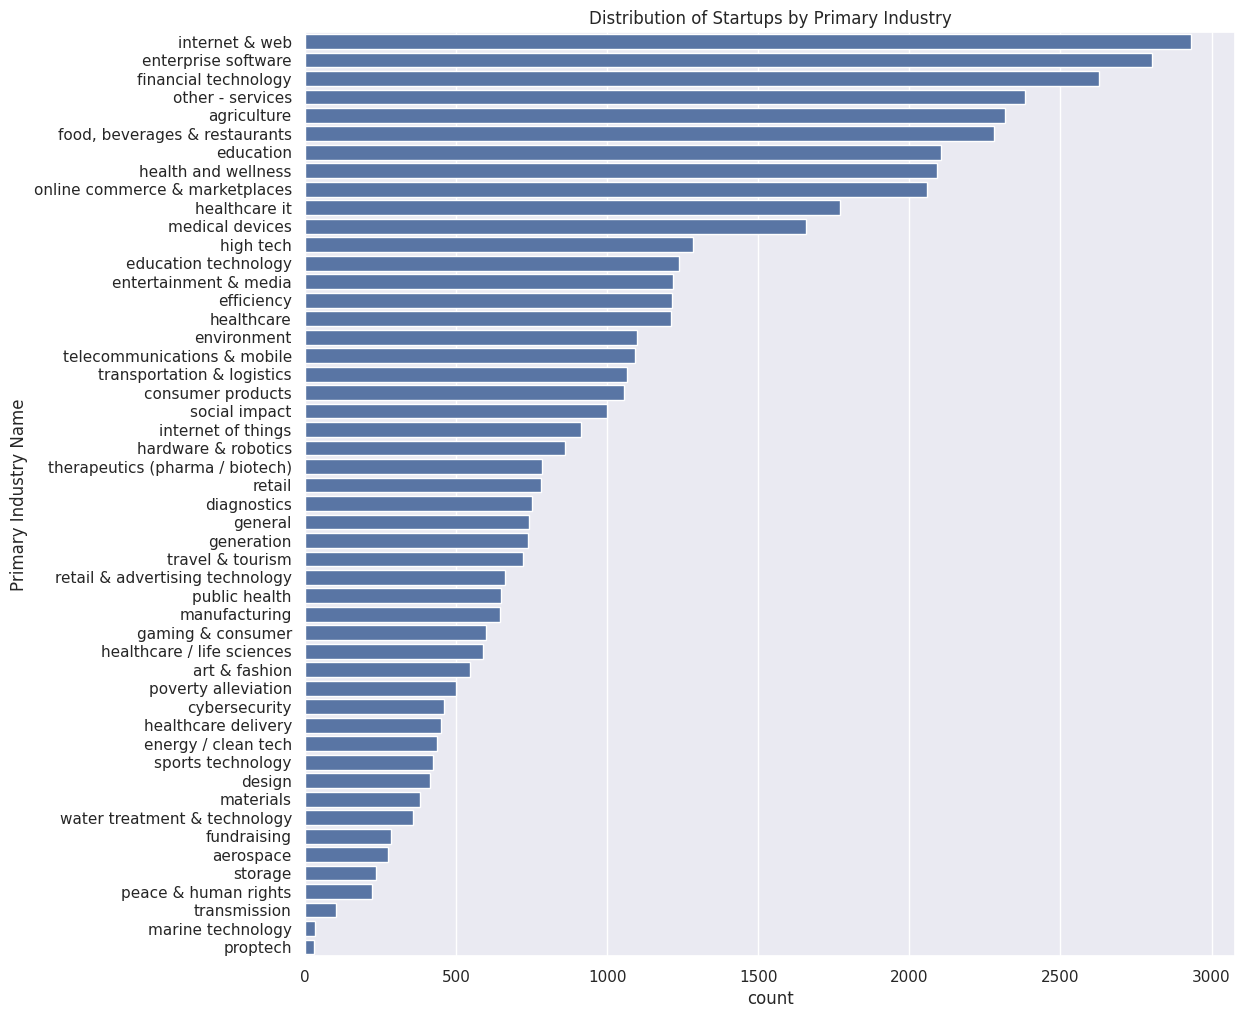

In [20]:
# Distribution of Startups by Primary Industry
plt.figure(figsize=(12, 12))
sns.countplot(y='Primary Industry Name', data= df_company, order= df_company['Primary Industry Name'].value_counts().index)
plt.title('Distribution of Startups by Primary Industry')
plt.show()

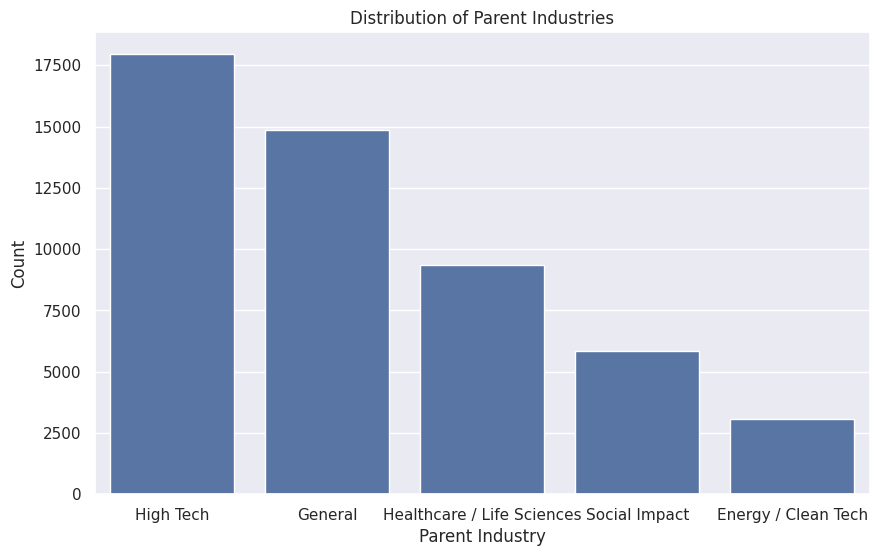

In [21]:
#Bar plot for the 'Parent Industry' distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Parent Industry', data= df_company, order= df_company['Parent Industry'].value_counts().index)
plt.title('Distribution of Parent Industries')
plt.xlabel('Parent Industry')
plt.ylabel('Count')
plt.show()


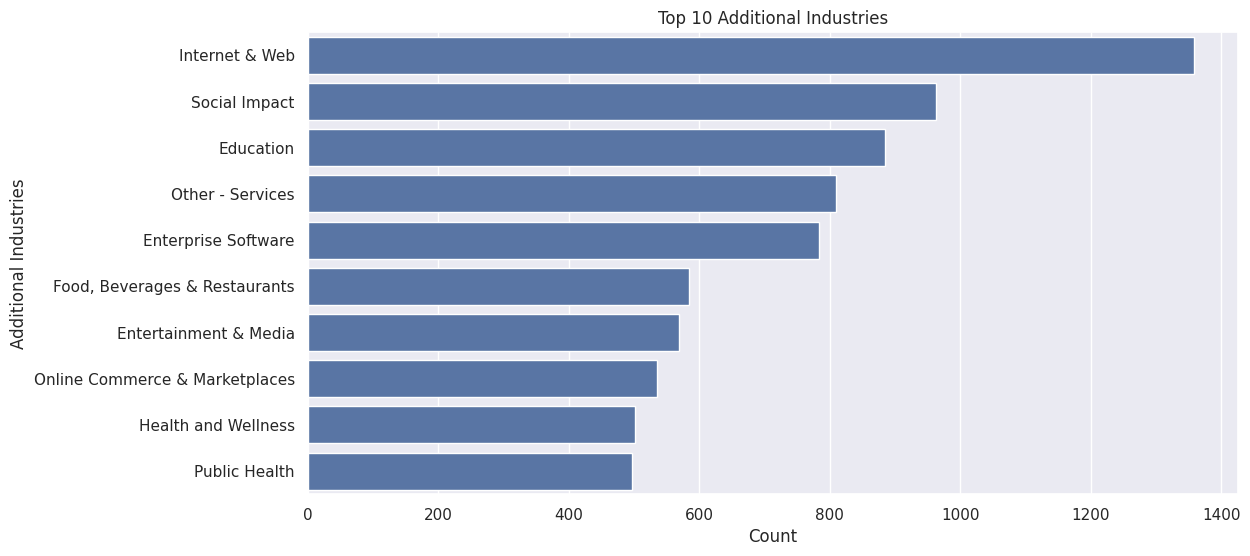

In [22]:
#Distribution of 'Additional Industries' - top 10
plt.figure(figsize=(12, 6))
top_additional_industries =  df_company['Additional Industries'].value_counts().head(10)
sns.barplot(x=top_additional_industries.values, y=top_additional_industries.index)
plt.title('Top 10 Additional Industries')
plt.xlabel('Count')
plt.ylabel('Additional Industries')
plt.show()


                                 StartupID  Organization ID  \
StartupID                         1.000000         0.968630   
Organization ID                   0.968630         1.000000   
Created by User ID                0.969916         0.937927   
first_time_founder                0.435584         0.409704   
Primary Contact User Id           0.969435         0.937378   
Primary Contact Core Profile ID   0.909087         0.875232   

                                 Created by User ID  first_time_founder  \
StartupID                                  0.969916            0.435584   
Organization ID                            0.937927            0.409704   
Created by User ID                         1.000000            0.458068   
first_time_founder                         0.458068            1.000000   
Primary Contact User Id                    0.998717            0.458538   
Primary Contact Core Profile ID            0.958948            0.499019   

                                

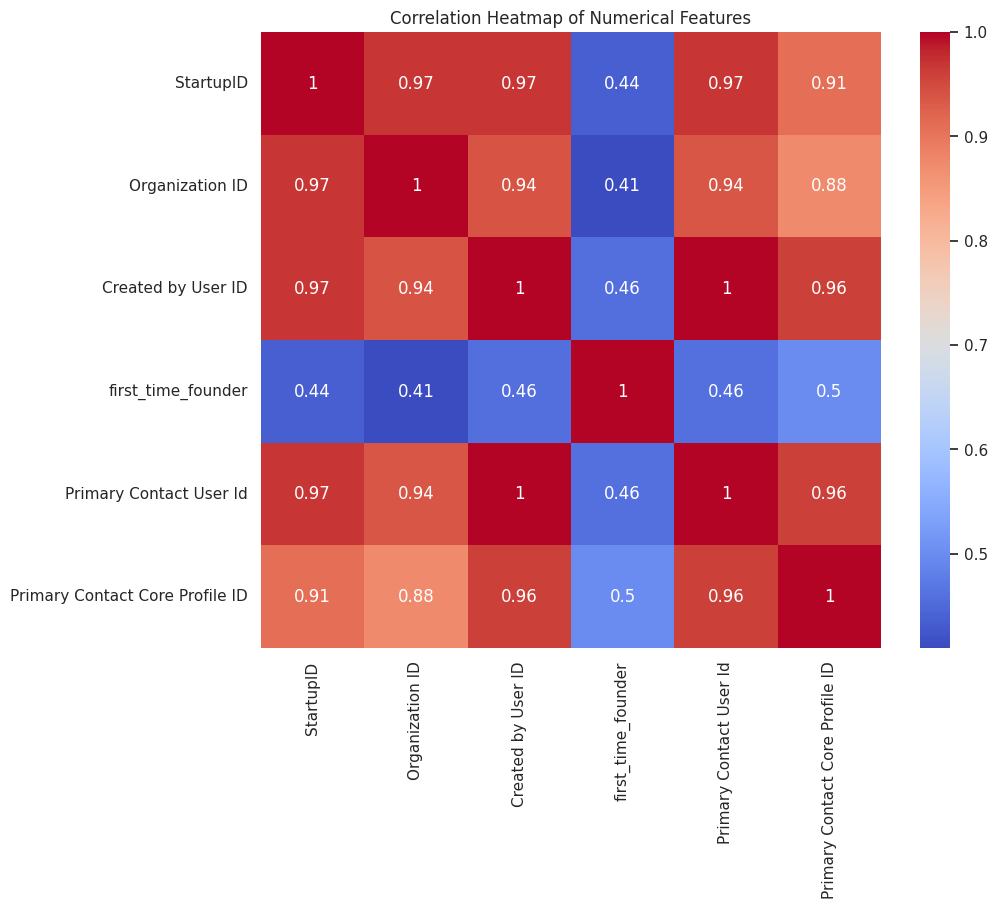

In [23]:
# Correlation heatmap for numerical features
plt.figure(figsize=(10, 8))
numerical_features =  df_company.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numerical_features.corr()
print(correlation_matrix)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

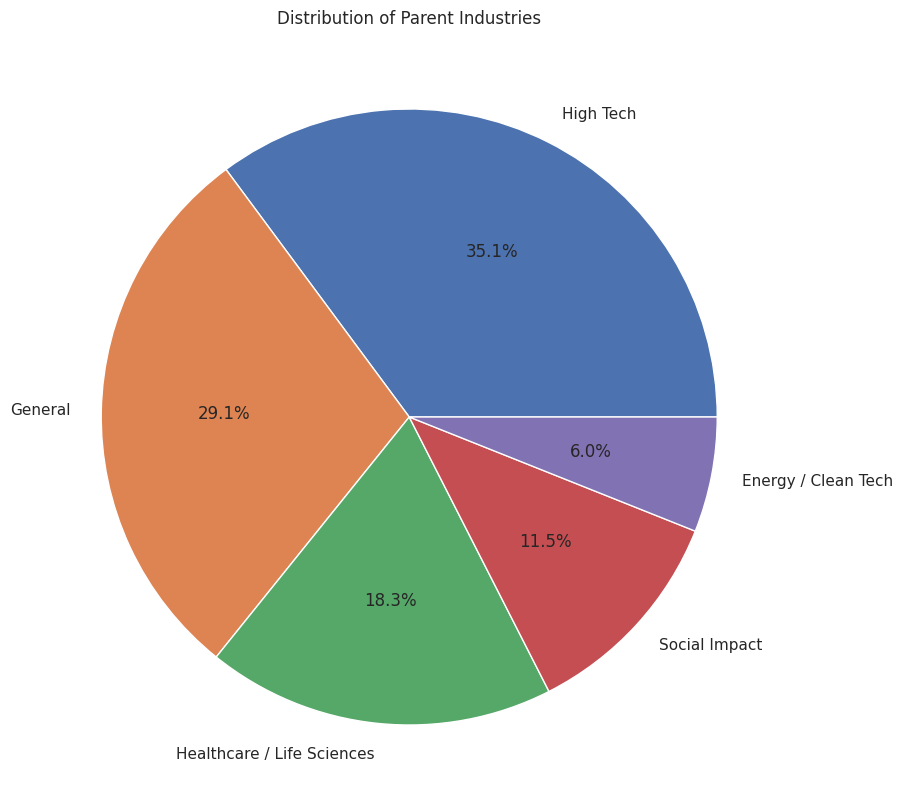

In [24]:
# Pie chart of parent industries
plt.figure(figsize=(12, 10))
df_company['Parent Industry'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Parent Industries')
plt.ylabel('')
plt.show()

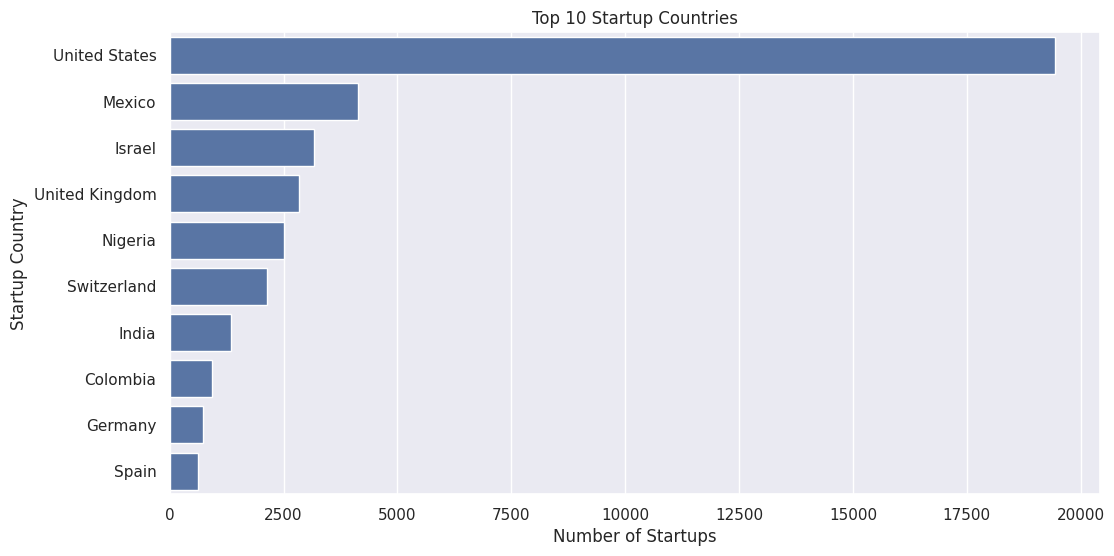

In [25]:
plt.figure(figsize=(12, 6))
sns.countplot(y='Startup Country', data=df_company, order=df_company['Startup Country'].value_counts().index[:10])
plt.xlabel('Number of Startups')
plt.ylabel('Startup Country')
plt.title('Top 10 Startup Countries')
plt.show()

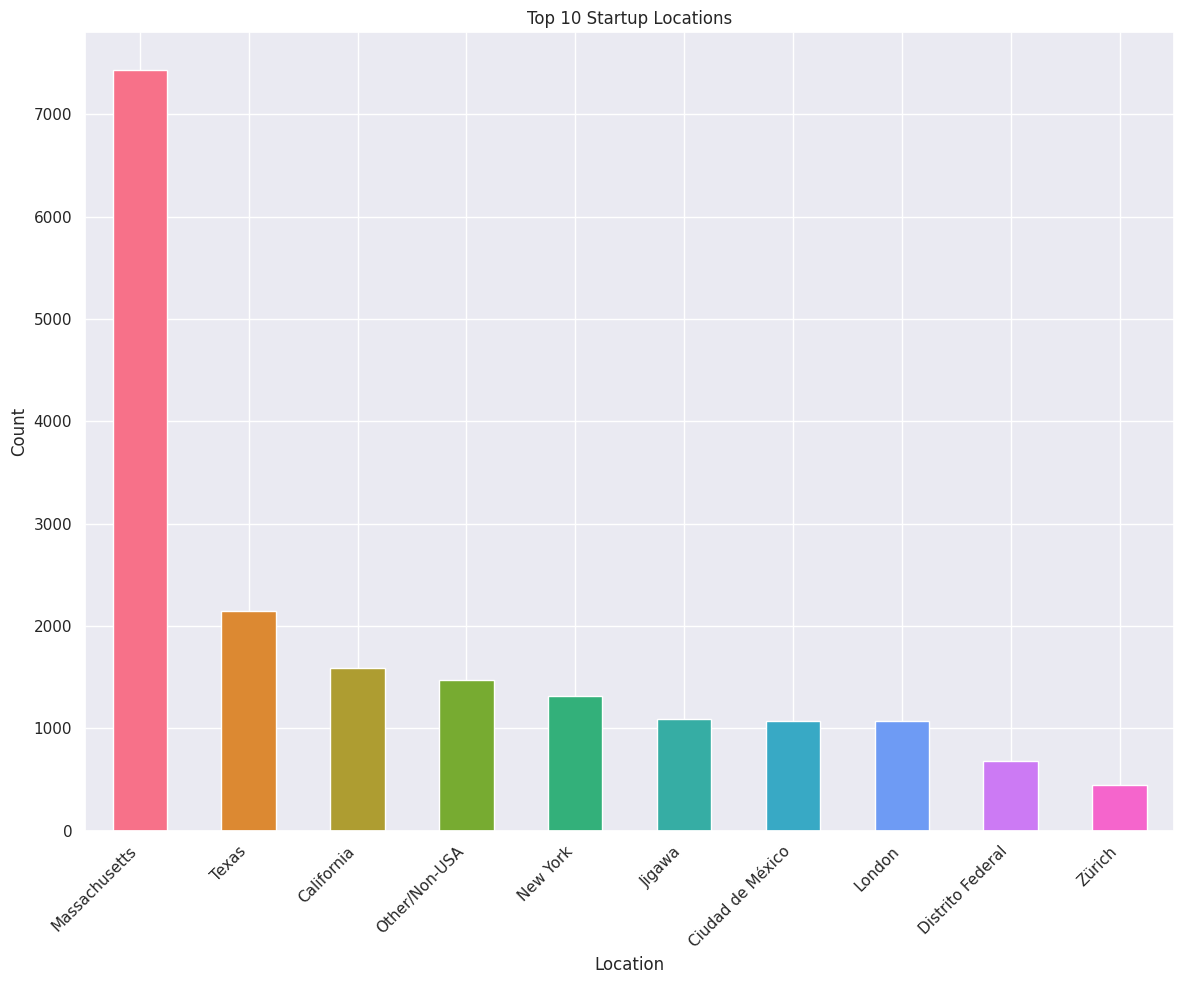

In [26]:
# Top 10 startup location
plt.figure(figsize=(12, 10))

# Get the top 10 locations
top_10_locations = df_company['location_regional'].value_counts().nlargest(10)

# Create a color palette
colors = sns.color_palette("husl", 10)  # You can also try "Set3", "tab10", or "rainbow"

# Plot the bar chart with different colors
top_10_locations.plot(kind='bar', color=colors)

plt.title('Top 10 Startup Locations')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<ipython-input-27-472e86f8eeb9>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_company['Date Founded'] = pd.to_datetime(df_company['Date Founded'], errors='coerce')


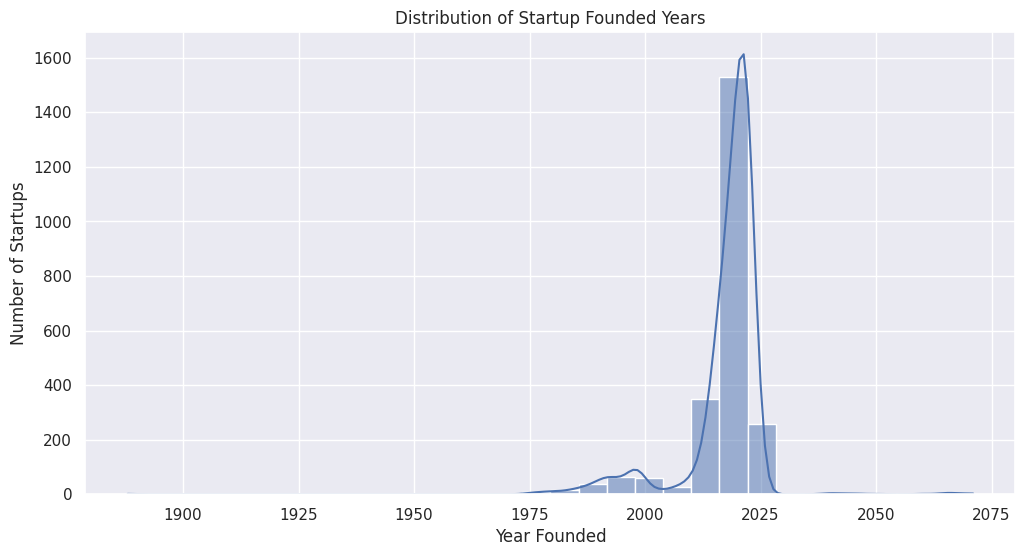

In [27]:



# Convert 'Date Founded' to datetime format
df_company['Date Founded'] = pd.to_datetime(df_company['Date Founded'], errors='coerce')

# Extract the year from the datetime object
df_company['Year Founded'] = df_company['Date Founded'].dt.year

# Drop rows where 'Year Founded' is NaN
df_year_founded = df_company.dropna(subset=['Year Founded'])

# Plot the histogram
plt.figure(figsize=(12, 6))
sns.histplot(df_year_founded['Year Founded'], bins=30, kde=True)
plt.xlabel('Year Founded')
plt.ylabel('Number of Startups')
plt.title('Distribution of Startup Founded Years')
plt.show()


In [28]:
# Clean text function
def clean_text(text):
    if pd.isnull(text):
        return ""
    text = text.lower()  # Lowercase text
    text = ''.join([char for char in text if char not in string.punctuation])  # Remove punctuation
    tokens = word_tokenize(text)  # Tokenize text
    tokens = [word for word in tokens if word not in stopwords.words('english')]  # Remove stopwords
    return ' '.join(tokens)

# Apply clean_text function to the relevant columns
df_company['clean_short_pitch'] = df_company['short_pitch'].apply(clean_text)
df_company['clean_full_pitch'] = df_company['full_elevator_pitch'].apply(clean_text)

# Handle missing values
df_company.fillna('', inplace=True)

# Combine the short pitch and full pitch into a single column for feature extraction
#df_company['combined_pitch'] = df_company['clean_short_pitch'] + ' ' + df_company['clean_full_pitch']

df_company.head()
#df_company.to_csv('clean_company_data.csv')

,StartupID,Organization ID,Startup Name,Created by User ID,Primary Industry Name,short_pitch,full_elevator_pitch,linked_in_url,facebook_url,video_elevator_pitch_url,...,location_regional,Accelerate URL,Primary Contact User Id,Primary Contact Core Profile ID,Parent Industry,Additional Industries,Mapped Primary Industry,Year Founded,clean_short_pitch,clean_full_pitch
0,23,11446,QMedic,892,healthcare / life sciences,QMedic's wearable medical alert service passiv...,80% of older adults do not press the panic but...,http://www.linkedin.com/company/qmedic,https://www.facebook.com/qmedichealth,http://youtu.be/mTO5goQ4sA8?rel=0,...,,https://accelerate.masschallenge.org/startup/2...,892,7,Healthcare / Life Sciences,High Tech,,,qmedics wearable medical alert service passive...,80 older adults press panic button falling car...
1,52,5842,Green City Growers,968,social impact,Green City Growers transforms unused space int...,GCG is an Urban Farming company focused on gro...,,https://www.facebook.com/pages/Green-City-Grow...,,...,,https://accelerate.masschallenge.org/startup/5...,968,72,Social Impact,Education; Environment; Public Health,,,green city growers transforms unused space thr...,gcg urban farming company focused growing much...
2,60,9169,Mootus,951,internet & web,Mootus is reinventing the way lawyers work thr...,The legal industry wastes billions on unnecess...,,https://www.facebook.com/Mootus,,...,,https://accelerate.masschallenge.org/startup/6...,951,58,High Tech,,,,mootus reinventing way lawyers work open onlin...,legal industry wastes billions unnecessary wor...
3,75,15498,Verbal Applications Inc.,1009,healthcare it,Verbal bridges the communications gap between ...,Imagine you or a loved one are in one of the 2...,http://www.linkedin.com/company/verbal-applica...,http://facebook.com/verbalapp,,...,,https://accelerate.masschallenge.org/startup/7...,1009,90111,Healthcare / Life Sciences,Design; Diagnostics; Enterprise Software; Heal...,,,verbal bridges communications gap patients car...,imagine loved one one 26 million hospital nurs...
4,84,14157,"Technology For Autism Now, Inc.",1025,education,Improving the lives of children and families l...,"Technology for Autism Now, Inc. (TAN), a 501c3...",http://www.linkedin.com/home?trk=hb_tab_home_top,http://www.facebook.com/groups/141818942524238/,http://youtu.be/Gl0fiTygSeE,...,,https://accelerate.masschallenge.org/startup/8...,1025,123,Social Impact,Social Impact,,,improving lives children families living autis...,technology autism inc tan 501c3 nonprofit orga...


In [ ]:
# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X = vectorizer.fit_transform(df_company['clean_full_pitch'])
y = df_company['Additional Industries']


# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the new splits
print("X_train shape:", X_train.shape)
print("X_val shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_val shape:",y_test.shape)



X_train shape: (40870, 1000)
X_val shape: (10218, 1000)
y_train shape: (40870,)
y_val shape: (10218,)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
# Initialize and train the KNN model
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)

# Predict and evaluate
y_pred = knn_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'K-Nearest Neighbors Classifier')
print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{report}')


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

K-Nearest Neighbors Classifier
Accuracy: 0.31571736151888824
Classification Report:
                                                                                                                                                                                                                             precision    recall  f1-score   support

                                                                                                                                                                                                                                  0.33      0.96      0.49      3317
                                                                                                                                                                                                                  Aerospace       0.00      0.00      0.00        11
                                                                                                                                    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X = vectorizer.fit_transform(df_company['clean_full_pitch'])
y = df_company['Additional Industries']

# Label Encoding the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Print the shapes of the new splits
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

# Initialize and train the Naive Bayes model
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Predict and evaluate
y_pred = nb_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Ensure target_names matches the labels in y_test
unique_labels = np.unique(y_test)
target_names = label_encoder.inverse_transform(unique_labels)

report = classification_report(y_test, y_pred, target_names=target_names, zero_division=1)

print(f'Naive Bayes Classifier')
print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{report}')


X_train shape: (40870, 1000)
X_test shape: (10218, 1000)
y_train shape: (40870,)
y_test shape: (10218,)
Naive Bayes Classifier
Accuracy: 0.32481894695635155
Classification Report:
                                                                                                                                                                                                                             precision    recall  f1-score   support

                                                                                                                                                                                                                                  0.33      1.00      0.49      3317
                                                                                                                                                                                                                  Aerospace       1.00      0.00      0.00        11
                                    

In [29]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
import xgboost as xgb
import lightgbm as lgb
import nltk
import string


# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X = vectorizer.fit_transform(df_company['clean_full_pitch'])
y = df_company['Additional Industries']

# Encode the labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the new splits
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


# AdaBoost
ada_model = AdaBoostClassifier(n_estimators=100, random_state=42)
ada_model.fit(X_train, y_train)
ada_predictions = ada_model.predict(X_test)
ada_accuracy = accuracy_score(y_test, ada_predictions)
print(f'AdaBoost Accuracy: {ada_accuracy}')
print(classification_report(y_test, ada_predictions))


X_train shape: (40870, 1000)
X_test shape: (10218, 1000)
y_train shape: (40870,)
y_test shape: (10218,)
AdaBoost Accuracy: 0.32423174789587006
              precision    recall  f1-score   support

           0       0.32      1.00      0.49      3317
           1       0.00      0.00      0.00        11
           2       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         1
          17       0.00      0.00      0.00         1
          20       0.00      0.00      0.00         1
          21       0.00      0.00      0.00         1
          29       0.00      0.00      0.00         1
          30       0.00      0.00      0.00         1
          31       0.00      0.00      0.00         1
          32       0.00      0.00      0.00         1
          41       0.00      0.00      0.00         1
          50       0.00      0.00      0.00   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.